In [18]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

## 피어슨 상관계수 구하기
$$ r = \frac{a \cdot b}{||a||||b||} $$
##### 두개의 변수 벡터사이의 내적을 두벡터 노름의 곱으로 나누어 계산함.

In [19]:
import numpy as np

# 예제 벡터 정의
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 두 벡터의 내적
dot_product = np.dot(a, b)

# 벡터 a와 b의 노름 계산
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)

# 피어슨 상관계수 계산
pearson_correlation = dot_product / (norm_a * norm_b)

# 결과 출력
print("벡터 a:", a)
print("벡터 b:", b)
print("a와 b의 내적:", dot_product)
print("a의 노름:", norm_a)
print("b의 노름:", norm_b)
print("피어슨 상관계수:", pearson_correlation)

벡터 a: [1 2 3]
벡터 b: [4 5 6]
a와 b의 내적: 32
a의 노름: 3.7416573867739413
b의 노름: 8.774964387392123
피어슨 상관계수: 0.9746318461970762


## Covariance matrix
### 공분산 행렬

In [20]:

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d

import pandas as pd

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size


# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data


# extract only the numeric data
# numberDataset = data._get_numeric_data()
#
# # # drop a few additional columns, and convert to a numpy array
# dataMat = numberDataset.drop(['state','fold'],axis=1).values
#
# datamean = np.mean(dataMat,axis = 0) # 특징 평균 벡터
# dataMatM = dataMat - datamean # 브로드캐스트를 이용한 평균 중앙화
# covMat = dataMatM.T @ dataMatM / (dataMatM.shape[0]-1)
# covMat


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [21]:
import numpy as np

# 데이터: 각 열이 변수, 각 행이 관측치
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

datamean = np.mean(data,axis = 0)
dataM = data - datamean
covData = dataM.T @ dataM /(dataM.shape[0] -1)
covData



array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

## 공분산과 상관계수 구하기

In [22]:
import numpy as np

# 공부 시간 : [2,3,5,9]
# 시험 점수 : [50,60,70,80,90]
A = np.array([[2,50],[3,60],[5,70],[7,80],[9,90]])

# 특징 평균 벡터 계산
meanA = np.mean(A,axis=0) # axis=0은 열방향 axis=1은 행방향으로 평균을 냄.
meanCenteringA = A - meanA # 평균 중심화 계산

convariance = meanCenteringA.T @ meanCenteringA / (A.shape[0] - 1) # 공분산 행렬 계산
print(convariance)
correlation = convariance[0,1] / (np.sqrt(convariance[0,0]) * np.sqrt(convariance[1,1]))

[[  8.2  45. ]
 [ 45.  250. ]]


## 벡터곱셈을 통한 기하학적 변환


### Transformation matrices

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
  -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
   0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
   0.89473684  1.        ]]


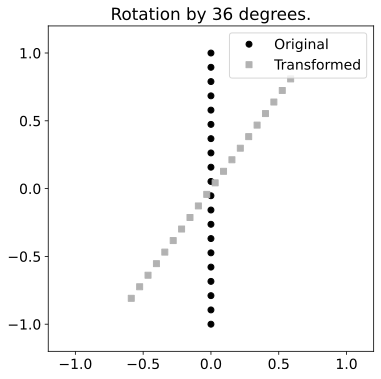

In [31]:

# Pure rotation matrix

# angle to rotate by
th = np.pi/5

# transformation matrix
T = np.array([
              [ np.cos(th),np.sin(th)],
              [-np.sin(th),np.cos(th)]
            ])

# original dots are a vertical line
x = np.linspace(-1,1,20)
origPoints = np.vstack( (np.zeros(x.shape),x) )


# apply the transformation
transformedPoints = T @ origPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',color=[.7,.7,.7],label='Transformed')

plt.axis('square')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.legend()
plt.title(f'Rotation by {np.rad2deg(th):.0f} degrees.')
plt.savefig('Figure_06_02.png',dpi=300)
plt.show()

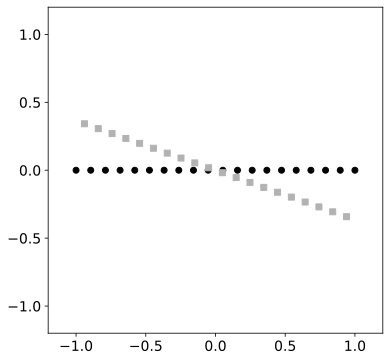

In [52]:
x = np.linspace(-1,1,20)

th = np.radians(20)

# transformation matrix
T = np.array([
              [ np.cos(th),np.sin(th)],
              [-np.sin(th),np.cos(th)]
            ])

line = np.vstack((x,np.zeros(x.shape)))
transformLine = T @ line
plt.figure(figsize=(6,6))
plt.plot(line[0,:],line[1,:],'ko',label='Original')
plt.plot(transformLine[0,:],transformLine[1,:],'s',color=[.7,.7,.7],label='Transformed')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

In [13]:
import numpy as np

print(np.e)

2.718281828459045
